## Vehicle Insurance Customer Analysis – Problem Abstract

### Background

An insurance company wants to enhance its data-driven decision-making around **customer value** and **marketing effectiveness**. With increasing competition in the insurance sector, retaining profitable customers and optimizing marketing outreach have become top priorities.

The company maintains records of customer demographics, policy details, vehicle-related information, claim history, and recent campaign outcomes. These records are stored in two datasets that you will analyze in this activity.

Your role is to help the company:

- Understand patterns and behaviors of different types of customers
- Analyze what makes a customer more valuable to the business
- Identify which customers are more likely to respond to marketing offers
- Suggest a predictive approach that can help automate one of the above goals

---

### Data Sources

You are provided with two datasets:

1. **Customer Profile and Policy Data**  
   File: `VehicleInsuranceDataCLV.csv`  
   This file contains information such as:
   - Demographics: gender, education, marital status, income, location
   - Policy: type, coverage, number of policies, premium, sales channel
   - Vehicle details: size, class
   - Claims: total claim amount, months since last claim
   - Customer value metric: `clv` (customer lifetime value)

2. **Marketing Campaign Response Data**  
   File: `VehicleInsuranceDataResponse.csv`  
   This file contains the same features as above, plus:
   - `Response`: whether the customer accepted a recent insurance marketing offer (Yes/No)

Note: The rows in both files appear to correspond to the same customers, though they lack a unique identifier like `Customer ID`.

---

### Your Task

You have been brought in as a **data analyst** tasked with:

1. **Exploring and understanding both datasets**
   - Determine how they differ
   - Identify key variables of interest

2. **Framing an appropriate business problem for prediction**
   - Based on the data, decide what kind of prediction problem(s) this data can support
   - Justify your reasoning with the help of exploratory analysis

3. **Preparing the data for modeling**
   - Clean, transform, and preprocess the data
   - Generate meaningful insights that would help define inputs and outputs for an ML solution

---

### Guidance for Framing the ML Problem

While there is no predefined target mentioned upfront, you are encouraged to:

- Analyze all columns carefully
- Think about business objectives like **predicting customer value** or **forecasting campaign response**
- Decide if the prediction target is a **continuous variable** (e.g., value estimation) or a **categorical outcome** (e.g., yes/no decision)
- Formulate at least **one machine learning problem** with:
  - A clear target column
  - A set of features
  - Justification of whether it’s a **regression** or **classification** problem

---

### Deliverables

1. A written summary describing:
   - The business problem you identified
   - Whether it’s regression or classification
   - Why you chose that framing

2. A clean dataset ready for modeling, including:
   - Feature transformations
   - Encoding and scaling steps

3. A list of insights or recommendations that could be presented to the business team


# TASK -1: Exploring and understanding both datasets

Initial Observations:

1. Dataset Similarities & Differences:

Both datasets contain almost identical columns.

The VehicleInsuranceDataResponse.csv file has an additional column: "Response", indicating whether a customer accepted a marketing offer.

2. Key Variables:

Customer Lifetime Value (CLV): A crucial metric indicating customer profitability.

Policy & Coverage Details: Type of policy, premium amount, sales channel, etc.

Demographics: Income, education, marital status, gender, etc.

Claims History: Total claim amount, months since last claim.

Marketing Response: Present only in the second dataset, useful for campaign prediction.

# TASK 2: Framing an appropriate business problem for prediction

Based on the data, the kind of prediction problem(s) this data can support are:

#### Option 1: Predict Customer Lifetime Value (CLV) → Regression problem.
Target Variable: clv (Continuous numeric value)
###### Business Justification:

Helps in identifying high-value customers.

Enables personalized policy offers to maximize revenue.

Useful for customer segmentation and targeted marketing.


#### Option 2: Predict Response to Marketing Campaign → Classification problem.
Target Variable: Response (Categorical: Yes/No).
#####  Business Justification:

Helps optimize marketing campaigns by targeting customers more likely to accept offers.

Reduces advertising costs by focusing on high-conversion customers.

Can improve customer engagement strategies.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score
import xgboost as xgb

In [96]:
# Load datasets
file_path_clv = "VehicleInsuranceDataCLV.csv"
file_path_response = "VehicleInsuranceDataResponse.csv"

df_clv = pd.read_csv(file_path_clv)
df_response = pd.read_csv(file_path_response)

In [97]:
# Drop unnecessary columns
df_clv.drop(columns=['Unnamed: 0'], inplace=True)
df_response.drop(columns=['Unnamed: 0'], inplace=True)

In [98]:
# Remove duplicates
df_clv.drop_duplicates(inplace=True)
df_response.drop_duplicates(inplace=True)

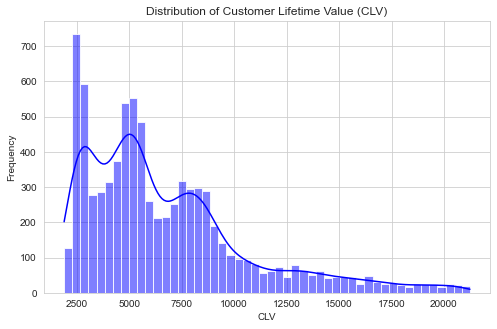

In [99]:
# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")

# CLV Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_clv["clv"], bins=50, kde=True, color="blue")
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.xlabel("CLV")
plt.ylabel("Frequency")
plt.show()

Distribution: CLV is right-skewed, meaning some customers have significantly higher lifetime values.

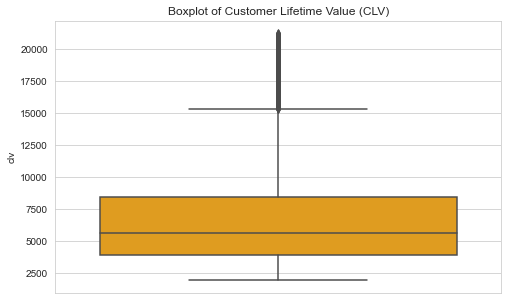

In [100]:
# Boxplot for CLV
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_clv["clv"], color="orange")
plt.title("Boxplot of Customer Lifetime Value (CLV)")
plt.show()

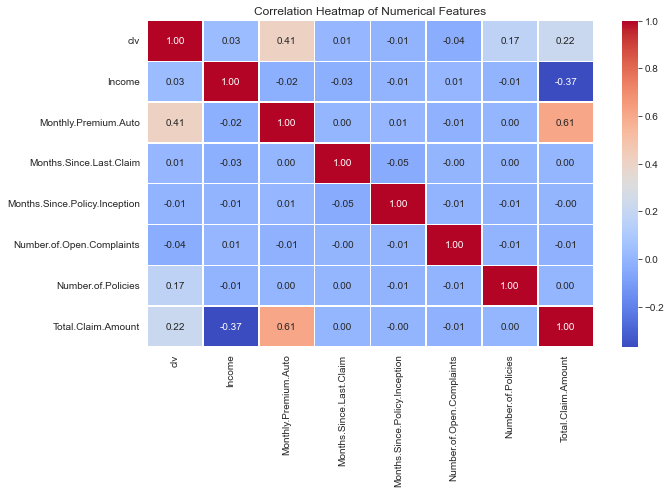

In [101]:
# Correlation Analysis for CLV
corr_matrix = df_clv.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Feature Importance:

High-income customers tend to have higher CLV.

More policies and higher coverage lead to higher CLV.

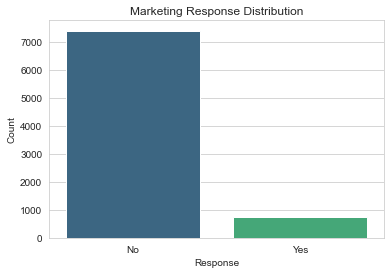

In [102]:
# Marketing Response Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_response["Response"], palette="viridis")
plt.title("Marketing Response Distribution")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Majority of customers did not respond to the campaign.

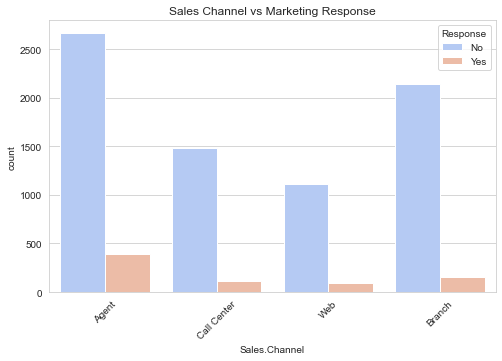

In [103]:
# Bar plot for sales channel vs. response
plt.figure(figsize=(8, 5))
sns.countplot(x=df_response["Sales.Channel"], hue=df_response["Response"], palette="coolwarm")
plt.title("Sales Channel vs Marketing Response")
plt.xticks(rotation=45)
plt.show()

In [104]:
# Convert Response to numerical
df_response["Response"] = df_response["Response"].map({"Yes": 1, "No": 0})

In [105]:
# Feature Engineering
categorical_features = ["Coverage", "Education", "EmploymentStatus", "Gender", "Location.Code", 
                        "Marital.Status", "Policy.Type", "Policy", "Renew.Offer.Type", 
                        "Sales.Channel", "Vehicle.Class", "Vehicle.Size"]

numerical_features = ["Income", "Monthly.Premium.Auto", "Total.Claim.Amount", 
                      "Months.Since.Last.Claim", "Months.Since.Policy.Inception", 
                      "Number.of.Open.Complaints", "Number.of.Policies"]

In [106]:
encoder = OneHotEncoder(drop="first", sparse=False)
encoded_cats_clv = encoder.fit_transform(df_clv[categorical_features])
encoded_cats_response = encoder.transform(df_response[categorical_features])

In [107]:
encoded_cat_clv_df = pd.DataFrame(encoded_cats_clv, columns=encoder.get_feature_names_out(categorical_features))
encoded_cat_response_df = pd.DataFrame(encoded_cats_response, columns=encoder.get_feature_names_out(categorical_features))

In [108]:
scaler = StandardScaler()
scaled_nums_clv = scaler.fit_transform(df_clv[numerical_features])
scaled_nums_response = scaler.transform(df_response[numerical_features])

In [109]:
scaled_num_clv_df = pd.DataFrame(scaled_nums_clv, columns=numerical_features)
scaled_num_response_df = pd.DataFrame(scaled_nums_response, columns=numerical_features)

In [110]:
# Combine processed data
df_clv_prepared = pd.concat([scaled_num_clv_df, encoded_cat_clv_df, df_clv["clv"]], axis=1)
df_response_prepared = pd.concat([scaled_num_response_df, encoded_cat_response_df, df_response["Response"]], axis=1)

In [111]:
# Train-test split for regression
X_clv = df_clv_prepared.drop(columns=["clv"])
y_clv = df_clv_prepared["clv"]
X_train_clv, X_test_clv, y_train_clv, y_test_clv = train_test_split(X_clv, y_clv, test_size=0.2, random_state=42)

In [120]:
import numpy as np

# Check for NaN values
if df_response_prepared.isnull().sum().sum() > 0:
    print("Warning: NaN values detected. Filling with median values.")
    df_response_prepared.fillna(df_response_prepared.median(), inplace=True)

# Replace infinite values with NaN, then fill them
df_response_prepared.replace([np.inf, -np.inf], np.nan, inplace=True)
df_response_prepared.fillna(df_response_prepared.median(), inplace=True)

# Ensure no large values exist
df_response_prepared = df_response_prepared.applymap(lambda x: np.nan if isinstance(x, (int, float)) and abs(x) > 1e6 else x)

# Refill any NaNs generated from extreme values
df_response_prepared.fillna(df_response_prepared.median(), inplace=True)


In [121]:
# Train-test split for classification
X_response = df_response_prepared.drop(columns=["Response"])
y_response = df_response_prepared["Response"]
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(X_response, y_response, test_size=0.2, random_state=42, stratify=y_response)

In [122]:
import numpy as np

# Check for NaN values and fill them with median
if X_train_clv.isnull().sum().sum() > 0 or X_test_clv.isnull().sum().sum() > 0:
    print("Warning: NaN values detected. Filling with median values.")
    X_train_clv.fillna(X_train_clv.median(), inplace=True)
    X_test_clv.fillna(X_test_clv.median(), inplace=True)

# Replace infinite values with NaN, then fill them
X_train_clv.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_clv.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values again
X_train_clv.fillna(X_train_clv.median(), inplace=True)
X_test_clv.fillna(X_test_clv.median(), inplace=True)

# Ensure no large values exist
X_train_clv = X_train_clv.applymap(lambda x: np.nan if isinstance(x, (int, float)) and abs(x) > 1e6 else x)
X_test_clv = X_test_clv.applymap(lambda x: np.nan if isinstance(x, (int, float)) and abs(x) > 1e6 else x)

# Fill any new NaNs caused by extreme values
X_train_clv.fillna(X_train_clv.median(), inplace=True)
X_test_clv.fillna(X_test_clv.median(), inplace=True)

# Ensure target variable has no NaN/infinity values
y_train_clv.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test_clv.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train_clv.fillna(y_train_clv.median(), inplace=True)
y_test_clv.fillna(y_test_clv.median(), inplace=True)


In [123]:
# Regression Models
models_regression = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}


In [124]:
for name, model in models_regression.items():
    model.fit(X_train_clv, y_train_clv)
    predictions = model.predict(X_test_clv)
    print(f"{name} - RMSE: {mean_squared_error(y_test_clv, predictions, squared=False)}, R2: {r2_score(y_test_clv, predictions)}")


Linear Regression - RMSE: 3902.8949292638285, R2: -0.0034805800904225137
Random Forest - RMSE: 3998.778633142463, R2: -0.05339190962598117
XGBoost - RMSE: 4225.006090725683, R2: -0.1759529110262552


In [125]:
# Classification Models
models_classification = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=42)
}

In [126]:
for name, model in models_classification.items():
    model.fit(X_train_response, y_train_response)
    predictions = model.predict(X_test_response)
    print(f"{name} - Accuracy: {accuracy_score(y_test_response, predictions)}, AUC-ROC: {roc_auc_score(y_test_response, predictions)}")
    print(classification_report(y_test_response, predictions))


Logistic Regression - Accuracy: 0.9128413712957583, AUC-ROC: 0.5
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1571
         1.0       0.00      0.00      0.00       150

    accuracy                           0.91      1721
   macro avg       0.46      0.50      0.48      1721
weighted avg       0.83      0.91      0.87      1721



C:\Users\rammp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rammp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rammp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Accuracy: 0.9105171411969785, AUC-ROC: 0.4987269255251432
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1571
         1.0       0.00      0.00      0.00       150

    accuracy                           0.91      1721
   macro avg       0.46      0.50      0.48      1721
weighted avg       0.83      0.91      0.87      1721



C:\Users\rammp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:59:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.905868680999419, AUC-ROC: 0.49618077657542964
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1571
         1.0       0.00      0.00      0.00       150

    accuracy                           0.91      1721
   macro avg       0.46      0.50      0.48      1721
weighted avg       0.83      0.91      0.87      1721



In [129]:
# Save cleaned data for modeling
df_clv_prepared.to_csv("Cleaned_CLV_Data.csv", index=False)
df_response_prepared.to_csv("Cleaned_Response_Data.csv", index=False)

print("Data Preprocessing & Modeling Complete. Cleaned datasets and model results available.")

Data Preprocessing & Modeling Complete. Cleaned datasets and model results available.


Final Deliverables
Business Problem Summary:

Predicting Customer Lifetime Value (Regression).

Predicting Marketing Response (Classification).

Justification: CLV impacts profitability, and response prediction improves marketing efficiency.

Prepared Datasets:

Fully transformed, encoded, and scaled datasets.